In [210]:
#CSV Details:

#it has just product as "bank_account_or_service"

In [211]:
##for better understanding, we have considered just 'Bank account or service', as of now

In [212]:
#predict the issue based on consumer complaint narrative

In [213]:
#where issue related to 'Account opening, closing, or management' are considered to be 1 and rest ( 'Deposits and withdrawals','Using a debit or ATM card',
#'Problems caused by my funds being low',
#'Making/receiving payments, sending money') as 0

In [214]:
#Building a Model to predict the "issue"- either 1 or 0 based on "Consumer Complaint Narrative"

In [337]:
#Libraries
import pandas as pd
import numpy as np
import string
import nltk
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [216]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [217]:
stopword = nltk.corpus.stopwords.words('english')

In [218]:
#Functions used :
#Label Encoding
#Punctuation Removal
#Number Removal
#Tokenizing
#Lower Case Conversion
#Stop words
#Token Concatenation

In [219]:
#Label Encoding 

In [220]:
def label_encoding(i):
    if i == 'Account opening, closing, or management':
        return 1
    else :
        return 0

In [221]:
#Punctuation Removal

In [222]:
def remove_punctuation(text):
    words = [word for word in text if word not in string.punctuation]
    text = ''.join(words)
    return text

In [223]:
#Number Removal

In [224]:
def remove_numbers(text):
    words = [word for word in text if not word.isdigit()]
    text = ''.join(words)
    return text

In [225]:
#Lower Case Conversion

In [226]:
def convert_to_lower(tokens):
    tokens=[word.lower() for word in tokens]
    return tokens

In [227]:
#Stopwords

In [228]:
def remove_stopwords(tokens):
    tokens=[word for word in tokens if word not in stopword]
    return tokens


In [229]:
#Token Concatenation

In [230]:
def concate_tokens(token):
    sentance = ''
    for i in token:
        sentance = sentance+i+' '
    return sentance    

In [232]:
df = pd.read_csv("bank_account_or_service.csv",index_col=0,error_bad_lines=False)

In [233]:
df.shape

(5711, 18)

In [234]:
df.columns

Index(['date_received', 'product', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zipcode', 'tags', 'consumer_consent_provided',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response', 'consumer_disputed?', 'complaint_id'],
      dtype='object')

In [235]:
pd.set_option("display.max_colwidth", None)

In [236]:
df.issue.unique()

array(['Deposits and withdrawals',
       'Account opening, closing, or management',
       'Using a debit or ATM card',
       'Problems caused by my funds being low',
       'Making/receiving payments, sending money'], dtype=object)

In [237]:
df_new1 = df[["issue","consumer_complaint_narrative"]]

In [238]:
df_new1['consumer_complaint_narrative'] =  df.consumer_complaint_narrative.apply(lambda i : str(i) )

In [239]:
df_new1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5711 entries, 192044 to 553037
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   issue                         5711 non-null   object
 1   consumer_complaint_narrative  5711 non-null   object
dtypes: object(2)
memory usage: 133.9+ KB


In [240]:
df_new1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5711 entries, 192044 to 553037
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   issue                         5711 non-null   object
 1   consumer_complaint_narrative  5711 non-null   object
dtypes: object(2)
memory usage: 133.9+ KB


In [241]:
df_new1['target'] = df_new1['issue'].map(label_encoding)

In [242]:
df_new1.target.value_counts()

0    3483
1    2228
Name: target, dtype: int64

In [243]:
df_new1[df_new1.issue == 'Deposits and withdrawals'].shape

(1401, 3)

In [244]:
df_new1['narrative_wo_punct'] = df_new1['consumer_complaint_narrative'].map(remove_punctuation)

In [245]:
df_new1['narrative_wo_punct'].head(1)

192044    I opened an account with M  T bank online on XXXXXXXX15 and immediately funded it with an automated transfer of 50000 A little over a week later I got a letter requesting that I fax in a copy of my DL Social and utility bill for address verification which I did on XXXXXXXX15 Fast forward to today XXXXXXXX15 and I have not heard anything back so I called M  T bank to find out the status and I was told that they still have not reviewed it and my 50000 was on hold I demanded that my account get shut down and my 50000 returned but I was told that could not happen until they reviewed my information that was faxed and released the hold on my account I asked how long that would take and I was told it would take as long as they want which would render my 50000 hostage until they got around to figuring stuff out \n
Name: narrative_wo_punct, dtype: object

In [246]:
df_new1['narrative_wo_numbers'] = df_new1['narrative_wo_punct'].map(remove_numbers)

In [247]:
df_new1['narrative_wo_numbers'].head(1)

192044    I opened an account with M  T bank online on XXXXXXXX and immediately funded it with an automated transfer of  A little over a week later I got a letter requesting that I fax in a copy of my DL Social and utility bill for address verification which I did on XXXXXXXX Fast forward to today XXXXXXXX and I have not heard anything back so I called M  T bank to find out the status and I was told that they still have not reviewed it and my  was on hold I demanded that my account get shut down and my  returned but I was told that could not happen until they reviewed my information that was faxed and released the hold on my account I asked how long that would take and I was told it would take as long as they want which would render my  hostage until they got around to figuring stuff out \n
Name: narrative_wo_numbers, dtype: object

In [248]:
df_new1['tokens'] = df_new1['narrative_wo_numbers'].map(word_tokenize)


In [249]:
df_new1['tokens'].head(1)

192044    [I, opened, an, account, with, M, T, bank, online, on, XXXXXXXX, and, immediately, funded, it, with, an, automated, transfer, of, A, little, over, a, week, later, I, got, a, letter, requesting, that, I, fax, in, a, copy, of, my, DL, Social, and, utility, bill, for, address, verification, which, I, did, on, XXXXXXXX, Fast, forward, to, today, XXXXXXXX, and, I, have, not, heard, anything, back, so, I, called, M, T, bank, to, find, out, the, status, and, I, was, told, that, they, still, have, not, reviewed, it, and, my, was, on, hold, I, demanded, that, my, account, get, shut, down, and, ...]
Name: tokens, dtype: object

In [250]:
df_new1['tokens_to_lower'] = df_new1['tokens'].map(convert_to_lower)

In [251]:
df_new1['tokens_to_lower'].head(1)

192044    [i, opened, an, account, with, m, t, bank, online, on, xxxxxxxx, and, immediately, funded, it, with, an, automated, transfer, of, a, little, over, a, week, later, i, got, a, letter, requesting, that, i, fax, in, a, copy, of, my, dl, social, and, utility, bill, for, address, verification, which, i, did, on, xxxxxxxx, fast, forward, to, today, xxxxxxxx, and, i, have, not, heard, anything, back, so, i, called, m, t, bank, to, find, out, the, status, and, i, was, told, that, they, still, have, not, reviewed, it, and, my, was, on, hold, i, demanded, that, my, account, get, shut, down, and, ...]
Name: tokens_to_lower, dtype: object

In [252]:
df_new1['wo_stopwords'] = df_new1['tokens_to_lower'].map(remove_stopwords)

In [253]:
df_new1.wo_stopwords.head(1)

192044    [opened, account, bank, online, xxxxxxxx, immediately, funded, automated, transfer, little, week, later, got, letter, requesting, fax, copy, dl, social, utility, bill, address, verification, xxxxxxxx, fast, forward, today, xxxxxxxx, heard, anything, back, called, bank, find, status, told, still, reviewed, hold, demanded, account, get, shut, returned, told, could, happen, reviewed, information, faxed, released, hold, account, asked, long, would, take, told, would, take, long, want, would, render, hostage, got, around, figuring, stuff]
Name: wo_stopwords, dtype: object

In [254]:
df_new1['final_text'] = df_new1['wo_stopwords'].map(concate_tokens)

In [255]:
df_new1.final_text.head(1)


192044    opened account bank online xxxxxxxx immediately funded automated transfer little week later got letter requesting fax copy dl social utility bill address verification xxxxxxxx fast forward today xxxxxxxx heard anything back called bank find status told still reviewed hold demanded account get shut returned told could happen reviewed information faxed released hold account asked long would take told would take long want would render hostage got around figuring stuff 
Name: final_text, dtype: object

In [256]:
#Independent and Target Variables

In [257]:
features_var = df_new1.final_text
target_var = df_new1.target

In [258]:
xtrain, xtest, ytrain, ytest = train_test_split(features_var,target_var, test_size=.2,random_state=100)

In [259]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((4568,), (1143,), (4568,), (1143,))

# Tfidf Vectorizer

In [291]:
x = df_new1.final_text
y = df_new1.target

In [292]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=100)
tf.fit(xtrain)
train_dtm=tf.transform(xtrain)
test_dtm=tf.transform(xtest)

In [293]:
#using  KnearestNeighbor

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(train_dtm,ytrain)
ypred_wo_tuning=knn.predict(test_dtm)

# score report
print(classification_report(ytest,ypred_wo_tuning))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       717
           1       0.64      0.58      0.61       426

    accuracy                           0.72      1143
   macro avg       0.70      0.69      0.70      1143
weighted avg       0.72      0.72      0.72      1143



In [310]:
# hyper-parameter tuning
tuned_paramaters = {'n_neighbors': np.arange(1, 25, 2),
                   'metric': ['hamming','euclidean','manhattan','Chebyshev'],
                    "weights":["uniform", "distance"]}
knn= KNeighborsClassifier()
knn_grid = GridSearchCV(estimator = knn, 
                        param_grid = tuned_paramaters, 
                        cv = 5, 
                        scoring = 'accuracy',verbose=2)

# fit the model on X_train and y_train using fit()
knn_grid.fit(train_dtm, ytrain)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] metric=hamming, n_neighbors=1, weights=uniform ..................
[CV] ... metric=hamming, n_neighbors=1, weights=uniform, total=   0.0s
[CV] metric=hamming, n_neighbors=1, weights=uniform ..................
[CV] ... metric=hamming, n_neighbors=1, weights=uniform, total=   0.0s
[CV] metric=hamming, n_neighbors=1, weights=uniform ..................
[CV] ... metric=hamming, n_neighbors=1, weights=uniform, total=   0.0s
[CV] metric=hamming, n_neighbors=1, weights=uniform ..................
[CV] ... metric=hamming, n_neighbors=1, weights=uniform, total=   0.0s
[CV] metric=hamming, n_neighbors=1, weights=uniform ..................
[CV] ... metric=hamming, n_neighbors=1, weights=uniform, total=   0.0s
[CV] metric=hamming, n_neighbors=1, weights=distance .................
[CV] .. metric=hamming, n_neighbors=1, weights=distance, total=   0.0s
[CV] metric=hamming, n_neighbors=1, weights=distance .................
[CV] .. metric=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .. metric=hamming, n_neighbors=7, weights=distance, total=   0.0s
[CV] metric=hamming, n_neighbors=7, weights=distance .................
[CV] .. metric=hamming, n_neighbors=7, weights=distance, total=   0.0s
[CV] metric=hamming, n_neighbors=7, weights=distance .................
[CV] .. metric=hamming, n_neighbors=7, weights=distance, total=   0.0s
[CV] metric=hamming, n_neighbors=7, weights=distance .................
[CV] .. metric=hamming, n_neighbors=7, weights=distance, total=   0.0s
[CV] metric=hamming, n_neighbors=7, weights=distance .................
[CV] .. metric=hamming, n_neighbors=7, weights=distance, total=   0.0s
[CV] metric=hamming, n_neighbors=9, weights=uniform ..................
[CV] ... metric=hamming, n_neighbors=9, weights=uniform, total=   0.0s
[CV] metric=hamming, n_neighbors=9, weights=uniform ..................
[CV] ... metric=hamming, n_neighbors=9, weights=uniform, total=   0.0s
[CV] metric=hamming, n_neighbors=9, weights=uniform ..................
[CV] .

[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:  4.4min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['hamming', 'euclidean', 'manhattan',
                                    'Chebyshev'],
                         'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=2)

In [297]:
# get the best parameters
print('Best parameters for KNN Classifier: ', knn_grid.best_params_, '\n')


Best parameters for KNN Classifier:  {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'} 



In [302]:
# after tuning
knn=KNeighborsClassifier(n_neighbors=11, weights='distance')
knn.fit(train_dtm,ytrain)
ypred_tuning=knn.predict(test_dtm)
print(classification_report(ytest,ypred_tuning))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       717
           1       0.69      0.56      0.62       426

    accuracy                           0.74      1143
   macro avg       0.73      0.70      0.71      1143
weighted avg       0.74      0.74      0.73      1143



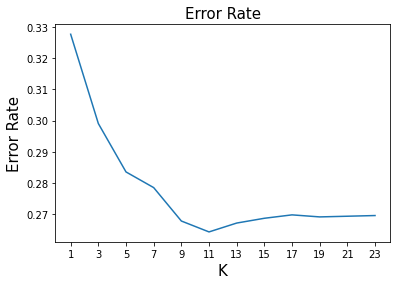

In [300]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
# consider an empty list to store error rate
error_rate = []

# use for loop to build a knn model for each K
for i in np.arange(1,25,2):
    
    # setup a knn classifier with k neighbors
    # use the 'euclidean' metric 
    knn = KNeighborsClassifier(i, metric = 'euclidean', weights = 'distance' )
   
    # fit the model using 'cross_val_score'
    # pass the knn model as 'estimator'
    # use 5-fold cross validation
    score = cross_val_score(knn, train_dtm, ytrain, cv = 5)
    
    # calculate the mean score
    score = score.mean()
    
    # compute error rate 
    error_rate.append(1 - score)

# plot the error_rate for different values of K 
plt.plot(range(1,25,2), error_rate)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Error Rate', fontsize = 15)
plt.xlabel('K', fontsize = 15)
plt.ylabel('Error Rate', fontsize = 15)

# set the x-axis labels
plt.xticks(np.arange(1, 25, step = 2))

# plot a vertical line across the minimum error rate
#plt.axvline(x = 7, color = 'red')

# display the plot
plt.show()

In [ ]:
# even the plot says that k=11 is the ideal value

In [ ]:
# using MultinomialNB

In [311]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(train_dtm, ytrain)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [312]:
y_pred_class_1 = nb.predict(test_dtm)

In [314]:
print(classification_report(ytest, y_pred_class_1))

              precision    recall  f1-score   support

           0       0.67      0.98      0.80       717
           1       0.84      0.19      0.31       426

    accuracy                           0.69      1143
   macro avg       0.75      0.59      0.55      1143
weighted avg       0.73      0.69      0.62      1143



In [296]:
# Using DecisionTreeClassifier

In [332]:
dt_1 = DecisionTreeClassifier()
dt_1.fit(train_dtm, ytrain)

y_pred_dt_1 = dt_1.predict(test_dtm)

In [335]:
print(classification_report(ytest,y_pred_dt_1))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       717
           1       0.56      0.53      0.54       426

    accuracy                           0.67      1143
   macro avg       0.64      0.64      0.64      1143
weighted avg       0.66      0.67      0.66      1143



In [ ]:
# using RandomForestClassifier

In [336]:
RF = RandomForestClassifier()
RF.fit(train_dtm, ytrain)
y_pred_RF = RF.predict(test_dtm)
print('Accuracy:',accuracy_score(ytest,y_pred_RF))
print()
print('Classification Report:',classification_report(ytest,y_pred_RF),sep="\n")

Accuracy: 0.7830271216097988

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.93      0.84       717
           1       0.82      0.54      0.65       426

    accuracy                           0.78      1143
   macro avg       0.79      0.73      0.75      1143
weighted avg       0.79      0.78      0.77      1143

